In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

In [92]:
pip install -U yellowbrick

     |████████████████████████████████| 276kB 4.2MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


## Preprocesamiento

In [2]:
df=pd.read_csv('/content/songs-dataset.csv')

In [3]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist(s),gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,Song Language,Do we like?
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,audio_features,1vlDwedZUvYaxt2FXoYGaJ,spotify:track:1vlDwedZUvYaxt2FXoYGaJ,https://api.spotify.com/v1/tracks/1vlDwedZUvYa...,https://api.spotify.com/v1/audio-analysis/1vlD...,247920,4,Held Down,['Laura Marling'],F,solo,England,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,audio_features,49FXvRiOm0uC85x4yhz5eP,spotify:track:49FXvRiOm0uC85x4yhz5eP,https://api.spotify.com/v1/tracks/49FXvRiOm0uC...,https://api.spotify.com/v1/audio-analysis/49FX...,179987,4,Blank Slate,['Chicano Batman'],M,band,United States,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,audio_features,6t51aLe7rjZhKgONwt6btQ,spotify:track:6t51aLe7rjZhKgONwt6btQ,https://api.spotify.com/v1/tracks/6t51aLe7rjZh...,https://api.spotify.com/v1/audio-analysis/6t51...,194576,4,Back Home (feat. Summer Walker),"['Trey Songz', 'Summer Walker']",V,colab,United States,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,audio_features,3FN5547t8mXmJQQWIHLS3Y,spotify:track:3FN5547t8mXmJQQWIHLS3Y,https://api.spotify.com/v1/tracks/3FN5547t8mXm...,https://api.spotify.com/v1/audio-analysis/3FN5...,293600,4,Ohio,['King Princess'],F,solo,United States,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,audio_features,0p7oSAo7L1nPXxtGMH3BzW,spotify:track:0p7oSAo7L1nPXxtGMH3BzW,https://api.spotify.com/v1/tracks/0p7oSAo7L1nP...,https://api.spotify.com/v1/audio-analysis/0p7o...,179040,4,Cellular,['King Krule'],M,solo,England,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,audio_features,5mj8WVFcKdGA8p9HWGTSLc,spotify:track:5mj8WVFcKdGA8p9HWGTSLc,https://api.spotify.com/v1/tracks/5mj8WVFcKdGA...,https://api.spotify.com/v1/audio-analysis/5mj8...,188654,4,Cuando Perriabas,['Bad Bunny'],M,solo,NaN,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4,Levitating (feat. DaBaby),"['Dua Lipa', 'DaBaby']",V,colab,NaN,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,audio_features,4mEILaBM7bKZqKAun5tABu,spotify:track:4mEILaBM7bKZqKAun5tABu,https://api.spotify.com/v1/tracks/4mEILaBM7bKZ...,https://api.spotify.com/v1/audio-analysis/4mEI...,193911,4,When We Were Young,"['Lost Kings', 'Norma Jean Martine']",V,colab,NaN,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,audio_features,6RcFtM4DrZVisQD8FgVftJ,spotify:track:6RcFtM4DrZVisQD8FgVftJ,https://api.spotify.com/v1/tracks/6RcFtM4DrZVi...,https://api.spotify.com/v1/audio-analysis/6RcF...,242750,4,Serenity,"['Chamsi', 'AJ Euro']",V,colab,NaN,2,English,R


In [4]:
columns_to_delete=['id','uri','type','track_href','analysis_url']

In [5]:
for i in columns_to_delete:
  n=i
  df.drop(n, inplace=True, axis=1)

In [6]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_name,artist(s),gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,Song Language,Do we like?
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,Held Down,['Laura Marling'],F,solo,England,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,Blank Slate,['Chicano Batman'],M,band,United States,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,Back Home (feat. Summer Walker),"['Trey Songz', 'Summer Walker']",V,colab,United States,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,Ohio,['King Princess'],F,solo,United States,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,Cellular,['King Krule'],M,solo,England,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,Cuando Perriabas,['Bad Bunny'],M,solo,NaN,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,Levitating (feat. DaBaby),"['Dua Lipa', 'DaBaby']",V,colab,NaN,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,When We Were Young,"['Lost Kings', 'Norma Jean Martine']",V,colab,NaN,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,Serenity,"['Chamsi', 'AJ Euro']",V,colab,NaN,2,English,R


In [7]:
song_name=df['song_name']
artists=df['artist(s)']

In [8]:
artists

0                          ['Laura Marling']
1                         ['Chicano Batman']
2            ['Trey Songz', 'Summer Walker']
3                          ['King Princess']
4                             ['King Krule']
                        ...                 
996                            ['Bad Bunny']
997                   ['Dua Lipa', 'DaBaby']
998     ['Lost Kings', 'Norma Jean Martine']
999                    ['Chamsi', 'AJ Euro']
1000                      ['Madeon', 'Kyan']
Name: artist(s), Length: 1001, dtype: object

In [9]:
df.drop('artist(s)', inplace=True, axis=1)
df.drop('song_name', inplace=True, axis=1)

In [10]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,Song Language,Do we like?
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,solo,England,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,band,United States,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,colab,United States,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,solo,United States,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,solo,England,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,solo,NaN,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,colab,NaN,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,colab,NaN,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,colab,NaN,2,English,R


In [11]:
countries=df['country'].unique()

In [12]:
countries

array(['England', 'United States', 'Canada', 'Spain', 'France', 'Chile',
       'Puerto Rico', 'Argentina', 'Mexico', 'Colombia', 'Peru', 'Norway',
       'Germany', 'Japan', 'Australia', 'Sweden', 'Nigeria', 'Malaysia',
       'Korea', 'Venezuela', '-', 'Panama', 'Ireland', 'Zimbawe',
       'Switzerland', 'New Zeland', 'Sudan', 'Dominican Republic',
       'Belarus', 'Iran', 'Italy', 'Cuba', 'Mali', 'Netherlands', 'UK',
       'Yugoslavia', 'South Africa', 'Israel', 'Denmark', 'Rusia',
       'Brazil', 'Poland', nan, 'Belgium', 'Greece'], dtype=object)

In [13]:
dic_country = {key: i+1 for i,key in enumerate(countries)}

In [14]:
dic_country

{'-': 21,
 'Argentina': 8,
 'Australia': 15,
 'Belarus': 29,
 'Belgium': 44,
 'Brazil': 41,
 'Canada': 3,
 'Chile': 6,
 'Colombia': 10,
 'Cuba': 32,
 'Denmark': 39,
 'Dominican Republic': 28,
 'England': 1,
 'France': 5,
 'Germany': 13,
 'Greece': 45,
 'Iran': 30,
 'Ireland': 23,
 'Israel': 38,
 'Italy': 31,
 'Japan': 14,
 'Korea': 19,
 'Malaysia': 18,
 'Mali': 33,
 'Mexico': 9,
 'Netherlands': 34,
 'New Zeland': 26,
 'Nigeria': 17,
 'Norway': 12,
 'Panama': 22,
 'Peru': 11,
 'Poland': 42,
 'Puerto Rico': 7,
 'Rusia': 40,
 'South Africa': 37,
 'Spain': 4,
 'Sudan': 27,
 'Sweden': 16,
 'Switzerland': 25,
 'UK': 35,
 'United States': 2,
 'Venezuela': 20,
 'Yugoslavia': 36,
 'Zimbawe': 24,
 nan: 43}

In [18]:
df['country'].replace(dic_country,inplace=True)

In [19]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,Song Language,Do we like?
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,solo,1,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,band,2,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,colab,2,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,solo,2,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,solo,1,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,solo,43,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,colab,43,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,colab,43,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,colab,43,2,English,R


In [20]:
typee = df['type(solo, colab, grpup/band)'].unique()
dic_type = {key: i+1 for i,key in enumerate(typee)}

In [21]:
dic_type

{'band': 2, 'band-colab': 4, 'colab': 3, 'solo': 1}

In [22]:
df['type(solo, colab, grpup/band)'].replace(dic_type,inplace=True)

In [23]:
gender = df['gender(of the atrist(s))'].unique()
dic_gen = {key: i+1 for i,key in enumerate(gender)}

In [24]:
dic_gen

{'-': 5, 'F': 1, 'M': 2, 'T': 4, 'V': 3}

In [25]:
df['gender(of the atrist(s))'].replace(dic_gen,inplace=True)

In [26]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,Song Language,Do we like?
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,1,1,1,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,2,2,2,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,3,3,2,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,1,1,2,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,2,1,1,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,2,1,43,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,3,3,43,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,3,3,43,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,3,3,43,2,English,R


In [27]:
language = df['Song Language'].unique()
dic_lan = {key: i+1 for i,key in enumerate(language)}

In [28]:
dic_lan

{'English': 1,
 'English-French': 9,
 'English-Italian': 4,
 'English-Korean': 5,
 'English-Spanish': 7,
 'French': 3,
 'French-Spanish': 14,
 'Korea': 10,
 'Korean': 8,
 'No/Lang': 6,
 'Portuguese-Spanish': 13,
 'Russian': 11,
 'Spanish': 2,
 nan: 12}

In [29]:
df['Song Language'].replace(dic_lan,inplace=True)

In [31]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,Song Language,Do we like?
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,1,1,1,1,1,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,2,2,2,1,1,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,3,3,2,2,1,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,1,1,2,1,1,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,2,1,1,1,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,2,1,43,1,2,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,3,3,43,2,1,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,3,3,43,2,1,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,3,3,43,2,1,R


In [33]:
like = df['Do we like?'].unique()
dic_likes = {key: i+1 for i,key in enumerate(like)}

In [34]:
dic_likes

{'F': 1, 'FR': 2, 'R': 4, 'RF': 3}

In [37]:
dic_likes["F"] = 1
dic_likes["R"] = 2
dic_likes["FR"] = 3
dic_likes["RF"] = 3

In [38]:
dic_likes

{'F': 1, 'FR': 3, 'R': 2, 'RF': 3}

In [39]:
df['Do we like?'].replace(dic_likes,inplace=True)

In [40]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,Song Language,Do we like?
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,1,1,1,1,1,1
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,2,2,2,1,1,1
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,3,3,2,2,1,1
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,1,1,2,1,1,1
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,2,1,43,1,2,3
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,3,3,43,2,1,3
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,3,3,43,2,1,2
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,3,3,43,2,1,2


## Clustering kmeans

In [41]:
data2numpy=pd.DataFrame(df).to_numpy()

In [44]:
data2numpy.shape

(1001, 19)

In [97]:
RSS=[]

In [108]:
resultado = skc.KMeans(n_clusters=9,init='random',max_iter=200).fit(data2numpy)
r=resultado.inertia_
RSS.append(r)

In [98]:
RSS

[]

In [99]:
t = np.arange(1, 10, 1)
t

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

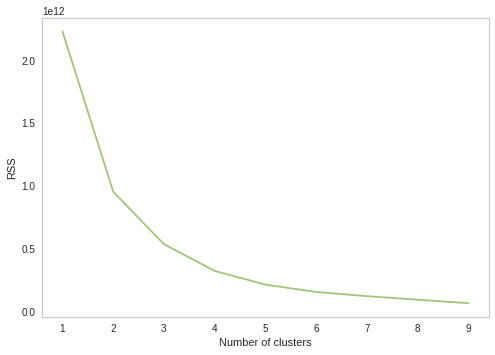

In [109]:
t = np.arange(1, 10, 1)

plt.plot(t, RSS , 'g')
plt.xlabel('Number of clusters')
plt.ylabel('RSS')
plt.grid()
plt.show()

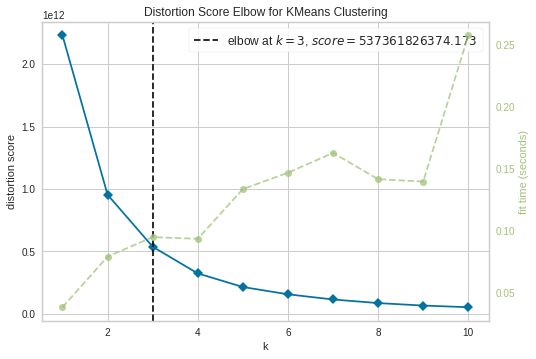

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8db910fd30>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [96]:
X, y = data2numpy,1
kelbow_visualizer(KMeans(random_state=4), X, k=(1,11))

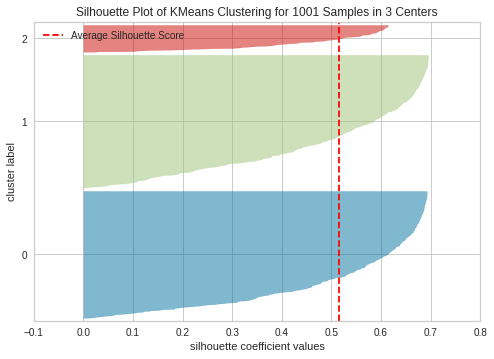

In [110]:
X, y = data2numpy,1

model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        
visualizer.show()        

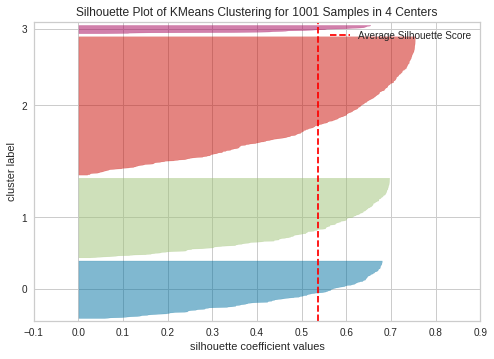

In [111]:
X, y = data2numpy,1

model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        
visualizer.show()

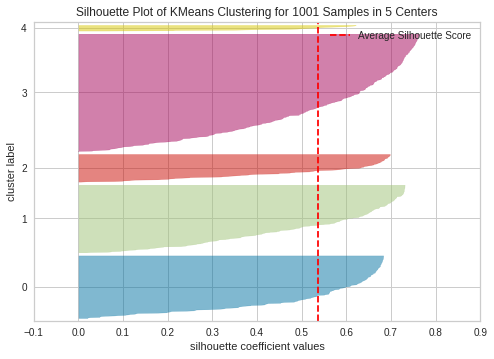

In [112]:
X, y = data2numpy,1

model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        
visualizer.show() 

In [124]:
results = skc.KMeans(n_clusters=4,init='random',max_iter=200).fit(data2numpy)
r=results.cluster_centers_

In [125]:
r.shape

(4, 19)

In [126]:
r[0]

array([ 6.29681034e-01,  6.74137931e-01,  4.72844828e+00, -6.47396552e+00,
        6.16379310e-01,  8.86767241e-02,  1.97501612e-01,  7.43511949e-02,
        1.80907759e-01,  4.71306034e-01,  1.25034159e+02,  2.50937858e+05,
        3.95258621e+00,  2.04310345e+00,  2.15948276e+00,  9.10775862e+00,
        1.82758621e+00,  1.56034483e+00,  1.88793103e+00])

In [127]:
r[1]

array([ 6.30653061e-01,  6.54816327e-01,  5.79591837e+00, -7.03669388e+00,
        4.89795918e-01,  8.30142857e-02,  1.77939530e-01,  1.65278808e-01,
        1.69261224e-01,  4.48630612e-01,  1.21324612e+02,  3.42220939e+05,
        4.02040816e+00,  2.02040816e+00,  1.91836735e+00,  7.22448980e+00,
        1.97959184e+00,  1.59183673e+00,  1.73469388e+00])

In [130]:
r[2]

array([ 7.02976744e-01,  6.77883721e-01,  5.16666667e+00, -6.09023256e+00,
        5.89147287e-01,  1.17682946e-01,  2.03023426e-01,  4.87464603e-02,
        1.82429457e-01,  5.12547674e-01,  1.23676384e+02,  1.60518659e+05,
        3.99224806e+00,  1.85658915e+00,  1.86821705e+00,  8.56201550e+00,
        1.50775194e+00,  1.63178295e+00,  1.94186047e+00])

In [132]:
r[3]

array([ 6.83186147e-01,  6.86564935e-01,  5.55194805e+00, -5.91340043e+00,
        5.36796537e-01,  9.16266234e-02,  1.81432821e-01,  4.35607913e-02,
        1.83893506e-01,  5.11415801e-01,  1.22600898e+02,  2.02428483e+05,
        3.97619048e+00,  1.95887446e+00,  2.06060606e+00,  9.70995671e+00,
        1.60822511e+00,  1.56060606e+00,  2.00865801e+00])